**BigMart Sales Prediction & analysis**

Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Statement Analysis


*   Supervised Machine Learning Problem.
*   The Target Value is Item_Outlet_Sales

Goal

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their Description

Item_Identifier: Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Checks the Concentration of fat in the product

Item_Visibility : The % of total display area of all similar products in a store

Item_Type: Category

Item_MRP : Maximum Retail Price for a Product

Outlet_Identifier : Store ID

Outlet_Establishment_Year :The year in which store was established

Outlet_Size :The size of the store (Area Size Category)

Outlet_Location_Type :In Terms of city Tiers (Size)

Outlet_Type :Grocery store or a type of supermarket

Item_Outlet_Sales : Sales of the product In the Specific outlet

In [ ]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Reading Train dataset

df= pd.read_csv("/content/drive/MyDrive/ANN_regresstion/Train.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
##Rows and Columns
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


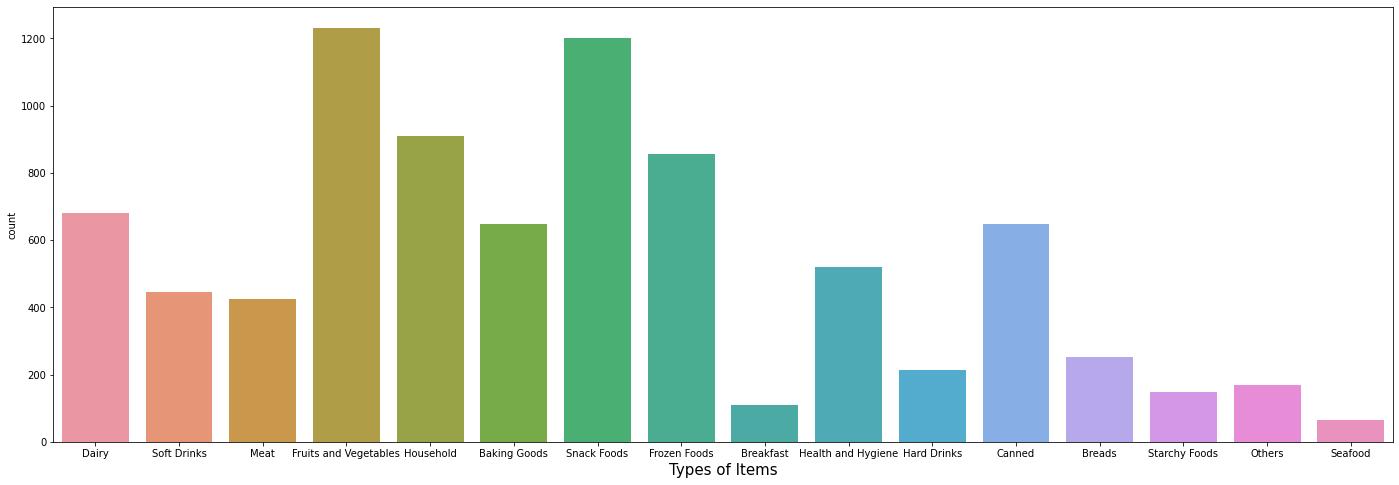

In [ ]:
#Countplot for Item_Type

plt.figure(figsize=(24,8))
sns.countplot(data=df, x='Item_Type')
plt.xlabel('Types of Items', fontsize=15)
plt.show()

<Axes: >

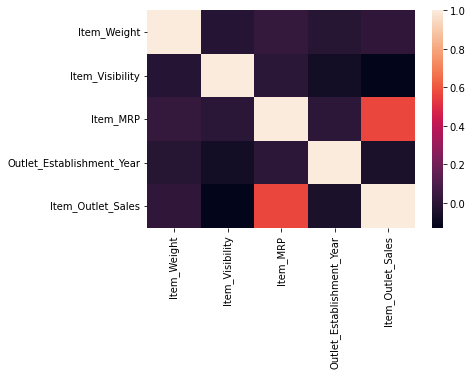

In [ ]:
#correlation for num columns
sns.heatmap(df.corr())

In [ ]:
#By using groupby we can find sales for each Item_Type
df.groupby("Item_Type")["Item_Outlet_Sales"].sum()


Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

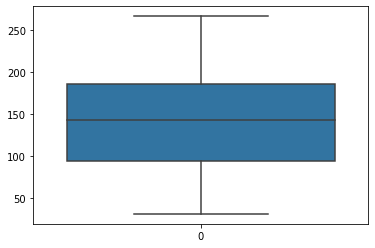

In [ ]:
sns.boxplot(df["Item_MRP"])

<Axes: >

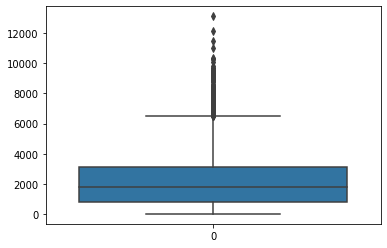

In [ ]:
sns.boxplot(df["Item_Outlet_Sales"])

Data Preprocessing

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df[df.duplicated()==True].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Lets check missing Values
print('Train:\n')
print('Missing Values by Count: \n\n',
      df.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100)

Train:

Missing Values by Count: 

 Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

Missing Values by %:

 Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [ ]:
##for numerical data
num_cols = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

In [ ]:
##Categorical data
cat_cols = df.columns.drop(num_cols)

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols] = df[cat_cols].astype("category")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(8), float64(4)
memory usage: 387.9 KB


In [ ]:
##dropping colums considering the unique values
X = df.drop(["Item_Identifier","Item_Outlet_Sales"],axis=1)

In [ ]:
y=df["Item_Outlet_Sales"]

In [ ]:
X.shape

(8523, 10)

In [ ]:
X.shape

(8523,)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
num_cols.pop()

'Item_Outlet_Sales'

Simple Imputing

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan , strategy="mean")
X_train[num_cols]=imputer.fit_transform(X_train[num_cols])
X_test[num_cols]=imputer.transform(X_test[num_cols])

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan , strategy="most_frequent")
X_train[cat_cols[1:]]=imputer.fit_transform(X_train[cat_cols[1:]])
X_test[cat_cols[1:]]=imputer.transform(X_test[cat_cols[1:]])

Standardization,Onehot encoding,label encoding

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
scaler = StandardScaler()
x_train_std = scaler.fit_transform(X_train[num_cols])
x_test_std = scaler.transform(X_test[num_cols])


In [ ]:
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[cat_cols[1:]]).toarray()
X_test_ohe = ohe.transform(X_test[cat_cols[1:]]).toarray()

In [ ]:
x_train_c =np.concatenate((x_train_std,X_train_ohe),axis=1)

In [ ]:
x_test_c = np.concatenate((x_test_std,X_test_ohe),axis = 1)

Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='softmax'))
model.compile(loss='ac', optimizer='adam')

In [ ]:
model.fit(x=x_train_c, y=y_train, validation_data=(x_test_c, y_test), batch_size=10, epochs=100, verbose=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                540       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


<Axes: >

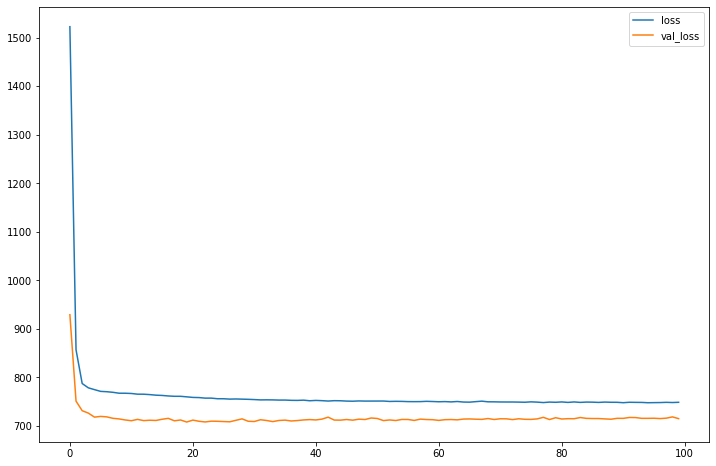

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8)) # Show results in a graph

In [ ]:
y_train_pred = model.predict(x_train_c)
y_test_pred=model.predict(x_test_c)

54/54 [==============================] - 0s 1ms/step


Error Metrics

In [ ]:
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
print("Train_MAE:", (mean_absolute_error(y_train,y_train_pred)))
print("Train_R2 Score:", r2_score(y_train,y_train_pred))
print("Test_MAE:", (mean_absolute_error(y_test,y_test_pred)))
print("Test_R2 Score:", r2_score(y_test,y_test_pred))

Train_MAE: 745.6763041186018
Train_R2 Score: 0.6048806908763227
Test_MAE: 715.2524479965791
Test_R2 Score: 0.6106511446145488


In [ ]:
  y_train_pred[:5]

array([[3122.4688],
       [2559.961 ],
       [1855.7117],
       [ 589.0702],
       [2369.5574]], dtype=float32)

In [ ]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64